# Lab 3: Polynomial regression

This lab is due on Wednesday, February 20.  Please complete this assignment in groups of 2 or 3, and be sure to enter everyone's names in the cell below.

Group members:  



In our last class meeting, we used linear functions to model data and make predictions.  It frequently happens, however, that a linear function is not the best choice for modeling data.  We will now see how the least squares techniques we have developed can be applied more generally.  The cell below provides the function <code>QR(A)</code>, which returns the $QR$ factorization of a matrix $A$. Be sure to evaluate this cell.

In [2]:
def projection(b, basis):
    return sum([b.dot_product(v)/v.dot_product(v)*v for v in basis])

def unit(v):
    return v/v.norm()

def vectors2matrix(vectors):
    return matrix(vectors).transpose()

def gs(basis):
    onbasis = []
    for b in basis:
        if len(onbasis) == 0: onbasis.append(b)
        else: onbasis.append(b-projection(b, onbasis))
    return map(unit, onbasis)

def QR(A):
    Q = vectors2matrix(gs(A.columns()))
    return Q, Q.T*A

### A first example

The cell below introduces a data set with four points and plots them.  Be sure to evaluate this cell.

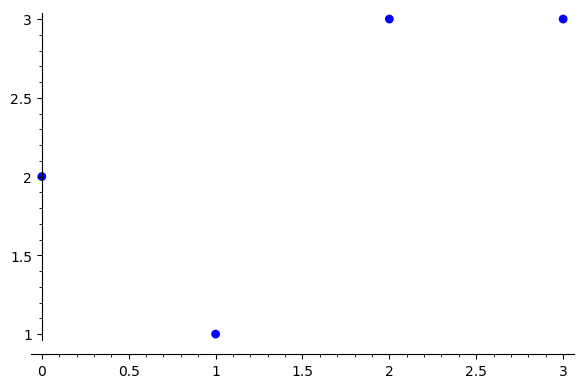

In [1]:
data = [[0,2], [1,1], [2,3], [3,3]]

list_plot(data, color='blue', size=40)

Suppose that we would like to fit a quadratic function $p(x) = \beta_0 + \beta_1x + \beta_2x^2$ to this data.  If we call the data points $(x_i, y_i)$, we obtain one equation for the unknown coefficients $\beta_0$, $\beta_1$, and $\beta_2$ from each data point by writing

$$
y_i = \beta_0 + \beta_1 x_i + \beta_2x_i^2.
$$

Find a matrix $A$ and vector ${\mathbf b}$ so that the equation $A{\mathbf x}={\mathbf b}$ describes the coefficients ${\mathbf x} = \begin{bmatrix}\beta_0 \\ \beta_1 \\ \beta_2 \end{bmatrix}$.

Now find the $QR$ factorization of $A$ and use it to find the least squares approximate solution to the equation $A{\mathbf x} = {\mathbf b}$.

You can plot your function along with the data points below if you enter your function inside the <code>plot</code> function.

In [0]:
list_plot(data, color='blue', size=40) + plot( your_function_here , 0, 3)

### Modeling sea ice

Understanding climate change is a fundamental problem of our age.  Given below is some data describing the extent of Arctic sea ice, measured in millions of square kilometers, by month of the year.  Data is given for 1980 and 2012.  The following cell provides the data and plots both sets.

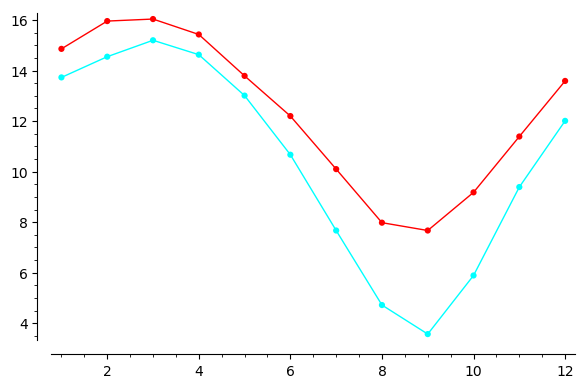

In [1]:
ice1980 = [[1,14.86], [2,15.96], [3,16.04], [4,15.43], [5,13.79], [6,12.2], [7,10.1], [8,7.98], [9,7.67], [10,9.18], [11,11.39], [12,13.59]]
ice2012 = [[1, 13.73], [2,14.55], [3,15.2], [4,14.63], [5,13.01], [6,10.67], [7,7.67], [8,4.72], [9, 3.57], [10,5.89], [11, 9.39], [12, 12.01]]

from sage.plot.colors import rainbow
def plot_data_sets(sets):
    colors = rainbow(len(sets))
    plot = list_plot([])
    for i, data in enumerate(sets):
        plot += list_plot(data, color=colors[i], plotjoined=True)  
        plot += list_plot(data, color=colors[i], size=20)
    return plot
plot_data_sets([ice1980, ice2012])

We would like to model these data sets with $k$-degree polynomials

$$
p(t) = \beta_0 + \beta_1t+\beta_2t^2 + \ldots + \beta_kt^k.
$$

The following cell provides a function <code>vandermonde(data, k)</code>.  If you say 
<code>
A, b = vandermonde(data, k)
</code>
you will have the matrix $A$ and vector ${\mathbf b}$ that sets up the linear system $A{\mathbf x} = {\mathbf b}$ to find the coefficients of the $k$-degree polynomial that fits the data.  (The matrix $A$ is called the *Vandermonde* matrix for this data set.)

In [4]:
def vandermonde(data, k):
    x, y = zip(*data)
    A = matrix([ [v**j for j in range(k+1)] for v in x])
    return A, vector(y)

Look at the 1980 data and use this function, along with a $QR$ factorization, to find the coefficients of least squares approximate solution with $k=8$.  

In [5]:
A, b = vandermonde(ice1980, 6)
A

[      1       1       1       1       1       1       1]
[      1       2       4       8      16      32      64]
[      1       3       9      27      81     243     729]
[      1       4      16      64     256    1024    4096]
[      1       5      25     125     625    3125   15625]
[      1       6      36     216    1296    7776   46656]
[      1       7      49     343    2401   16807  117649]
[      1       8      64     512    4096   32768  262144]
[      1       9      81     729    6561   59049  531441]
[      1      10     100    1000   10000  100000 1000000]
[      1      11     121    1331   14641  161051 1771561]
[      1      12     144    1728   20736  248832 2985984]

The following cell defines a function <code>plot_regression(data, k)</code> that will plot the least squares approximate $k$-degree polynomial, along with the data.  Have a look for the 1980 data.

In [6]:
import numpy as np
def poly_regression(data, k):
    ind, dep = zip(*data)
    A = np.array([ [v**j for j in range(k+1)] for v in ind])
    A = matrix(A)
    B = A.T*A
    b = A.T*vector(dep)
    coefficients = B \ b
    return coefficients * vector([x^i for i in range(k+1)])

def plot_regression(data, k, color='blue'):
    x, y = zip(*data)
    f = poly_regression(data, k)
    return list_plot(data, color=color, size=20) + plot(f, min(x), max(x), color=color)

plot_regression(ice1980, 8)


Because we have 12 data points for each year, you may think that it would be best to use an 11-degree polynomial, which would pass through every point.  Use the cell below to look at this polynomial for the 1980 data.

In [9]:
plot_regression(ice1980, 11)

You can see that the function has some odd properties that most likely do not reflect reality.  Data, especially that taken from measurements, will always have some uncertainty in it, which is often called *noise*.  Consequently, we should make sure that we do not try to infer too much from it.  If we require the data to pass through each of the data points, we are putting too much trust in the data;  this phenomenon is called *overfitting*.  Instead, we will see more realistic functions using a smaller value of $k$.  Use the cell below to look at the functions with $k=2, 4, 6, 8$ and state which you think best fits the 1980 data.

In [15]:
plot_regression(ice1980, 5)

Enter what you think looks like a reasonable value of $k$ here:

Let's now compare 1980 to 2012.  Let's begin by graphing the best fit polynomials with $k = 6$ for the two data sets.

In [8]:
plot_regression(ice1980, 6, color='blue') + plot_regression(ice2012, 6, color='red')

Climate scientists are interested in understanding the rate at which sea ice is melting.  Using our best fit polynomials, we can estimate this rate.  The cell below will provide you with functions `p80` and `p12` plotted above.  

In [16]:
p80 = poly_regression(ice1980, 6)
p12 = poly_regression(ice2012, 6)

Here are three helpful Sage commands that can be applied to a function `f`:
* `f.derivative()` gives the derivative $f'$ of the function.
* `f(x = 2)` evaluates the function at 2.
* `find_root(f, a, b)` finds a root of the function $f$ between $a$ and $b$.

For the two years given, 1980 and 2012, find the rate at which sea ice is melting most rapidly.

To do this, you will want to find the minimum value of the derivatives $p80'$ and $p12'$.  You may want to remember how to use calculus to find the minimum value of a function.

In [19]:
p80p = p80.derivative()
p80pp = p80p.derivative()
t = find_root(p80pp, 2, 8)
p80p(x=t)

-2.181693535716903

In [21]:
plot(p80p, 1, 12)